## Module 5

In this assignment, you are going to work on Histograms and Scatterplots.

We have preprocessed the data as "df" for you. 

Follow the instructions and finish the rest part.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
import imp, os, sys
sol = imp.load_compiled("solutions", "./solutions.py")
sol.get_solutions("imdb.xlsx")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

In [2]:
# Loading the data
import pandas as pd
import numpy as np

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

print("Finished.")

Finished.


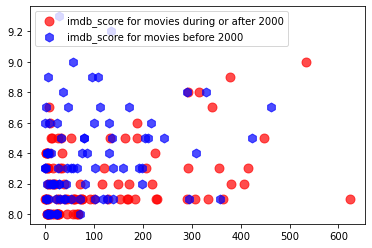

In [19]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1

# your code here
# prepare the DataFrame
df_after_2000 = df[df["title_year"] >= 2000]
df_before_2000 = df[df["title_year"] < 2000]

# create the scatter plot
plt1.scatter(
    df_after_2000["gross"] / 1000000, df_after_2000["imdb_score"],
    marker = "o",
    color = "r",
    alpha = 0.7,
    s = 80,
    label = "imdb_score for movies during or after 2000"
)
plt1.scatter(
    df_before_2000["gross"] / 1000000, df_before_2000["imdb_score"],
    marker = "h",
    color = "b",
    alpha = 0.7,
    s = 80,
    label = "imdb_score for movies before 2000"
)

# add legend
plt1.legend(loc = 'upper left')

# show scatter plot
plt1.show()

In [18]:
assert_frame_equal(df_before_2000, sol.df_before_2000)
assert_frame_equal(df_after_2000, sol.df_after_2000)
np.testing.assert_array_equal(plt1, sol.plt1)
print("Success!")

Success!


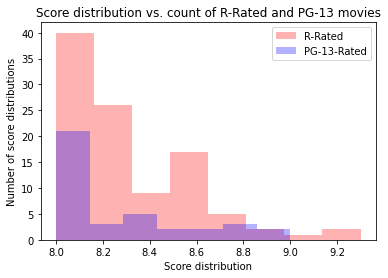

In [24]:
"""Q2: 
Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.
Describe your plot. 

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2

# your code here
# prepare the data of R-Rated movies and PG-13 ones
df_R = df[df["content_rating"] == "R"]
df_PG13 = df[df["content_rating"] == "PG-13"]

# create histogram - score distribution vs. count
plt2.hist(
    df_R["imdb_score"],
    alpha = 0.3,
    color = "red",
    label = "R-Rated",
    bins = "auto"
)
plt2.hist(
    df_PG13["imdb_score"],
    alpha = 0.3,
    color = "blue",
    label = "PG-13-Rated",
    bins = "auto"
)

# add label for x-axis and y-axis
plt2.xlabel("Score distribution")
plt2.ylabel("Number of score distributions")

plt2.legend(loc = "best")
plt2.title("Score distribution vs. count of R-Rated and PG-13 movies")

# show the histogram
plt2.show() 

In [25]:
assert_frame_equal(df_R, sol.df_R)
assert_frame_equal(df_PG13, sol.df_PG13)
np.testing.assert_array_equal(plt2, sol.plt2)
print("Success!")

Success!
